# Predict the price for the Pre-Owned UK Cars

The data contains 9 csv files. Each file has the information (price,year,mileage etc) about each car brand, including Audi, BMW, Ford, Hyundai, Mercedes, Skoda, Toyota, Vauxhall and Volkswagen. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Data

In [2]:
!pip install wget
import wget

# URL of the website folder containing CSV files
website_url = "https://raw.githubusercontent.com/440box/car-price-prediction-UK/main/"

# List of CSV files to download
csv_files = [
    "audi.csv",
    "bmw.csv",
    "ford.csv",
    "hyundi.csv",
    "merc.csv",
    "skoda.csv",
    "toyota.csv",
    "vauxhall.csv",
    "vw.csv"
]

# Loop through each CSV file and download it using wget
for file in csv_files:
    download_url = website_url + file
    wget.download(download_url)
    audi = pd.read_csv('/content/audi.csv')
bmw = pd.read_csv('/content/bmw.csv')
ford = pd.read_csv('/content/ford.csv')
hyundai = pd.read_csv('/content/hyundi.csv')
merc = pd.read_csv('/content/merc.csv')
skoda = pd.read_csv('/content/skoda.csv')
toyota = pd.read_csv('/content/toyota.csv')
vauxhall = pd.read_csv('/content/vauxhall.csv')
vw = pd.read_csv('/content/vw.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=32950b68ea84453a75e3272822c530e81d088b102de7e5e2085fff24c4a5bdfd
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


## Checking the number of columns in each dataset

In [3]:
print("Columns in the Audi dataframe:") 
print(list(audi.columns))
print("-" * 50)
print("Columns in the BMW dataframe:")
print(list(bmw.columns))
print("-" * 50)
print("Columns in the Ford dataframe:")
print(list(ford.columns))
print("-" * 50)
print("Columns in the Hyundai dataframe:")
print(list(hyundai.columns))
print("-" * 50)
print("Columns in the Mercedes dataframe:")
print(list(merc.columns))
print("-" * 50)
print("Columns in the Skoda dataframe:")
print(list(skoda.columns))
print("-" * 50)
print("Columns in the Toyota dataframe:")
print(list(toyota.columns))
print("-" * 50)
print("Columns in the Vauxhall dataframe:")
print(list(vauxhall.columns))
print("-" * 50)
print("Columns in the VW dataframe:")
print(list(vw.columns))

Columns in the Audi dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the BMW dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the Ford dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the Hyundai dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax(£)', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the Mercedes dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the Skoda dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',

1. It is observed that in hyundai dataset, the tax column is having a special character (pound).

In [4]:
hyundai.rename({'tax(£)': 'tax'},axis=1,inplace=True)

## Adding a column make to identify the manufacturer for combining the datasets

In [5]:
audi['make'] = 'Audi'
bmw['make'] = 'BMW'
ford['make'] = 'Ford'
hyundai['make'] = 'Hyundai'
merc['make'] = 'Mercedes'
skoda['make'] = 'Skoda'
toyota['make'] = 'Toyota'
vauxhall['make'] = 'Vauxhall'
vw['make'] = 'Volkswagen'

In [6]:
df = pd.concat([audi, bmw, ford, hyundai, merc, skoda, toyota, vauxhall, vw], axis=0, ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   make          99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.6+ MB


In [8]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi


In [9]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
make            0
dtype: int64

### There are no missing values in the dataset

In [10]:
df.nunique()

model             195
year               27
price           13236
transmission        4
mileage         42214
fuelType            5
tax                48
mpg               208
engineSize         40
make                9
dtype: int64

### By observing the unique values we can understand that the columns "Model", "fuelType" and "transmission" and "make" are categorical columns

# Exploratory Data Analysis

In [11]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


### Year

From the info we got from the dataset, it is observed that there is atleast 1 car with the year as 2060

In [12]:
df[df['year'] == 2060]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
39175,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4,Ford


It is observed that there is 1 car from the manufacturer Ford that is having year as 2060. Since we don't have any other information regarding this data, we can remove this entry

In [13]:
df = df.drop(df[df['year'] == 2060].index)

Also it is observed that there are some cars with the year 1970

In [14]:
df[df['year'] == 1970]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
56346,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0,Mercedes
81235,Zafira,1970,10495,Manual,37357,Petrol,200,42.2,1.4,Vauxhall


There are only 2 cars with the year as 1970. Also in the current situation the cars with the model of 1970's are not allowed to be used these 2 cars can be removed from the data.

In [15]:
df = df.drop(df[df['year'] == 1970].index)

### Engine Size

In [16]:
df[df['engineSize'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
7505,Q5,2019,44790,Automatic,5886,Petrol,135,117.7,0.0,Audi
7506,Q3,2019,32788,Automatic,1500,Diesel,145,47.1,0.0,Audi
7516,Q3,2020,29944,Manual,1500,Petrol,145,40.9,0.0,Audi
7517,Q3,2020,33333,Automatic,1500,Diesel,145,47.1,0.0,Audi
7518,Q3,2020,29944,Automatic,1500,Petrol,145,32.5,0.0,Audi
...,...,...,...,...,...,...,...,...,...,...
95678,Tiguan,2016,15300,Manual,38398,Diesel,145,53.3,0.0,Volkswagen
95685,Tiguan,2018,24000,Automatic,22200,Diesel,145,47.9,0.0,Volkswagen
96851,Up,2017,8500,Manual,20324,Petrol,20,64.2,0.0,Volkswagen
96909,Up,2017,8000,Manual,24444,Petrol,20,60.1,0.0,Volkswagen


There are 272 rows with engine size as 0. So this needs to be handled in the feature engineering part

### Mileage

There are some cars with mileage as 1

In [17]:
df[df['mileage'] == 1]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
5492,Q7,2019,69000,Automatic,1,Diesel,145,30.1,4.0,Audi
12818,X2,2020,24490,Semi-Auto,1,Diesel,145,52.3,2.0,BMW
28379,Fiesta,2017,10995,Manual,1,Petrol,145,65.7,1.0,Ford
28582,Fiesta,2017,10995,Manual,1,Petrol,145,65.7,1.0,Ford
32578,EcoSport,2019,17900,Semi-Auto,1,Petrol,145,45.6,1.0,Ford
32622,Focus,2019,17880,Manual,1,Diesel,145,74.3,1.5,Ford
38355,Mondeo,2008,1299,Manual,1,Diesel,200,47.9,2.0,Ford
38642,Edge,2019,33495,Automatic,1,Diesel,145,37.2,2.0,Ford
42083,Kona,2020,21320,Manual,1,Petrol,145,44.1,1.0,Hyundai
42107,Santa Fe,2019,40365,Semi-Auto,1,Diesel,145,39.2,2.2,Hyundai


Some vehicles are from the year 2020. So it makes sense. But There are some vehicles that have the year less than 2020 but with mileage as 1

In [18]:
len(df[(df['mileage'] ==1) & (df['year'] != 2020)])

37

Since there are only 37 cars with mileage as 1, these data points can be removed.

In [19]:
df = df.drop(df[(df['mileage']==1) & (df['year']<= 2019)].index)

### Tax

In [20]:
df[df['tax'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
30,A1,2015,9500,Automatic,54754,Diesel,0,76.3,1.6,Audi
50,A4,2016,12750,Manual,52561,Diesel,0,74.3,2.0,Audi
58,A3,2016,10200,Manual,66369,Diesel,0,83.1,1.6,Audi
60,A1,2013,7000,Manual,76269,Diesel,0,74.3,1.6,Audi
69,A1,2016,10800,Manual,18181,Petrol,0,67.3,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
98724,Golf SV,2016,10550,Manual,16739,Diesel,0,72.4,1.6,Volkswagen
98726,Golf SV,2015,8950,Manual,45000,Diesel,0,72.4,1.6,Volkswagen
98731,Golf SV,2015,9695,Manual,21151,Diesel,0,72.4,1.6,Volkswagen
98751,Golf SV,2014,8650,Manual,32535,Diesel,0,72.4,1.6,Volkswagen


There are nearly 6300 datapoints with tax as 0. So this should be handled in feature engineering

### Price

<ipython-input-32-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

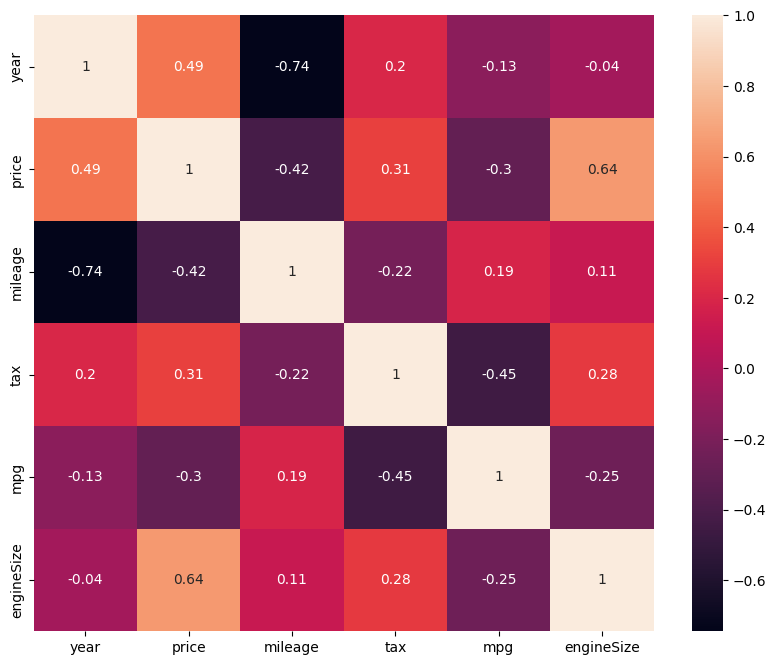

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

There is an extremely positive correlation between year and price and an extremely negative correlation between mileage and price. This makes sense, since newer cars are generally more expensive and cars with more mileage are relatively cheaper. We also notice a negative correlation between mileage and year - the newer a car is the less miles it is likely to have travelled. Furthermore, we notice a positive correlation between engine size and price, as well as engine size and tax. This follows expectation, since it is common practice for manufacturers to sell models with larger engines for a higher price in comparison to the same model with a smaller engine. As a result, due to the higher price, a larger tax payment is required, hence the positive correlation. This also explains the positive correlation between tax and price.

In [ ]:
sns.scatterplot(x=df['mileage'],y=df['price'])
plt.title('Scatter plot of Mileage against Price')

Text(0.5, 1.0, 'Scatter plot of Mileage against Price')

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='make',y='price',data=df)

It is observed that the cars Audi, BMW, Mercedes, Volkswagen have higher price than average. But the cars Hyundai and Skoda points seems to be outliers. So those points can be removed

In [ ]:
for i in range(91,100,1):
    print('The {0}th percentile of price is {1}'.format(i, np.percentile(df['price'],i)))

The 91th percentile of price is 29541.72
The 92th percentile of price is 30422.320000000007
The 93th percentile of price is 31499.0
The 94th percentile of price is 32890.0
The 95th percentile of price is 34400.0
The 96th percentile of price is 36500.0
The 97th percentile of price is 39980.0
The 98th percentile of price is 44990.08
The 99th percentile of price is 52000.0


In [ ]:
for i in np.arange(99,100,0.1):
    print('The {0}th percentile of price is {1}'.format(round(i,1), np.percentile(df['price'],i)))

The 99.0th percentile of price is 52000.0
The 99.1th percentile of price is 53240.84600000009
The 99.2th percentile of price is 54897.487999999954
The 99.3th percentile of price is 55797.921999999424
The 99.4th percentile of price is 56995.0
The 99.5th percentile of price is 59144.24999999703
The 99.6th percentile of price is 61517.87999999826
The 99.7th percentile of price is 65000.0
The 99.8th percentile of price is 69995.0
The 99.9th percentile of price is 79885.25399999479


In [ ]:
df[(df['make'] == 'Toyota') & (df['price'] < 2000)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
63734,Corolla,2005,1300,Manual,129000,Petrol,260,36.7,1.8,Toyota
63919,Corolla,2003,1495,Manual,89000,Petrol,235,39.2,1.6,Toyota
63923,Corolla,2004,1250,Manual,111000,Petrol,260,37.2,1.8,Toyota
63949,Corolla,2001,899,Automatic,76000,Petrol,300,35.3,1.6,Toyota
64436,RAV4,2002,1600,Manual,140000,Petrol,325,32.1,2.0,Toyota
66107,Yaris,2002,950,Manual,104000,Petrol,200,40.4,1.5,Toyota
66110,Yaris,1999,1995,Automatic,89000,Petrol,160,42.9,1.3,Toyota
66280,Yaris,2008,1985,Automatic,124309,Petrol,150,48.7,1.3,Toyota
66295,Yaris,2003,975,Manual,107000,Petrol,145,50.4,1.0,Toyota
66490,Yaris,2006,1550,Manual,100418,Petrol,125,52.3,1.0,Toyota


In [ ]:
df = df.drop(df[(df['make'] == 'Hyundai') & (df['price'] > 80000)].index)

In [ ]:
df[(df['make'] == 'Skoda') & (df['price']> 80000)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
62386,Karoq,2019,91874,Automatic,3764,Petrol,145,40.9,1.5,Skoda


In [ ]:
df = df.drop(df[(df['make'] == 'Skoda') & (df['price'] > 80000)].index)

### Fuel Type

In [ ]:
sns.boxplot(x=df['fuelType'],y=df['price'])

It is observed that the petrol vehicles are cheaper than the other fuel type vehicles

### Transmission

In [ ]:
sns.boxplot(x=df['transmission'],y=df['price'])

It is evident that the Automatic and Semi-Automatic cars are higher price than the manual transmission. This feature has clear significant influence on the price of the vehicles

### Price

In [ ]:
sns.distplot(df['price'])

### Year

In [ ]:
sns.distplot(df['year'])

### Mileage

In [ ]:
sns.distplot(df['mileage'])

### Tax

In [ ]:
sns.distplot(df['tax'])

### MPG

In [ ]:
sns.distplot(df['mpg'])

### Engine Size

In [ ]:
sns.distplot(df['engineSize'])

It is observed that mileage and price are having right skewed distribution

# Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi


In [ ]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [ ]:
X_transmission = pd.get_dummies(X['transmission'], drop_first=True)
X_transmission.rename(columns={'Other':'Other Transmission'}, inplace=True)
X_fuelType = pd.get_dummies(X['fuelType'], drop_first=True)
X_fuelType.rename(columns={'Other':'Other FuelType'}, inplace=True)
X_make = pd.get_dummies(X['make'], drop_first=True)
X_model = pd.get_dummies(X['model'], drop_first=True)
X = pd.concat([X,X_transmission,X_fuelType,X_make, X_model],axis=1)
X.drop(['transmission', 'fuelType', 'make', 'model'], axis = 1, inplace=True)

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = X_train_.copy(deep=True)
X_test = X_test_.copy(deep=True)
y_train = y_train_.copy(deep=True)
y_test = y_test_.copy(deep=True)

Engine Size

In [ ]:
engineSize_median = X_train['engineSize'].median()
print('The median of Engine Size is : {0}'.format(engineSize_median))
engineSize_median = 1.6

The median of Engine Size is : 1.6


In [ ]:
X_train['engineSize'] = X_train['engineSize'].replace(to_replace=0,value=engineSize_median)
X_test['engineSize'] = X_test['engineSize'].replace(to_replace=0,value=engineSize_median)

Tax

In [ ]:
tax_mean = X_train['tax'].mean()
print('The mean of tax is {0}'.format(tax_mean))
tax_mean = 120.41

The mean of tax is 120.41895614734972


In [ ]:
X_train['tax'] = X_train['tax'].replace(to_replace=0,value=tax_mean)
X_test['tax'] = X_test['tax'].replace(to_replace=0,value=tax_mean)

Mileage

In [ ]:
from scipy import stats

In [ ]:
mileage,mileage_lambda = stats.boxcox(X_train['mileage'])

In [ ]:
print('The lambda for boxcox transform of mileage is {0}'.format(mileage_lambda))
mileage_lambda=0.36762127618713064

The lambda for boxcox transform of mileage is 0.36762127618713064


In [ ]:
sns.distplot(mileage)

In [ ]:
test_mileage = stats.boxcox(X_test['mileage'],mileage_lambda)

In [ ]:
X_train['mileage_transformed'] = mileage
X_test['mileage_transformed'] = test_mileage

In [ ]:
X_train.head()

,year,mileage,tax,mpg,engineSize,Manual,Other Transmission,Semi-Auto,Electric,Hybrid,...,Z4,Zafira,Zafira Tourer,i3,i8,180,200,220,230,mileage_transformed
76366,2013,56536,125.0,51.4,1.4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,149.213879
45038,2017,14951,145.0,68.9,2.1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,90.454286
80035,2019,10748,145.0,47.1,1.2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79.807783
6234,2018,10767,145.0,42.8,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,79.861385
314,2013,49000,325.0,29.7,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,141.430003


Price

In [ ]:
price,price_lambda = stats.boxcox(y_train)

In [ ]:
print('The lambda for boxcox transform of price is {0}'.format(price_lambda))
price_lambda=0.03888231697484755

The lambda for boxcox transform of price is 0.03888231697484755


In [ ]:
sns.distplot(price)

In [ ]:
test_price = stats.boxcox(y_test,price_lambda)

In [ ]:
y_train_trans = price
y_test_trans = test_price

# Model Creation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle

In [ ]:
X_train.drop(['mileage'], axis=1, inplace=True)
X_test.drop(['mileage'], axis=1, inplace=True)

### Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train_trans)

LinearRegression()

In [ ]:
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [ ]:
train_r2 = r2_score(y_train_trans, y_train_pred)
print('The train R2 value is {0}'.format(train_r2))

test_r2 = r2_score(y_test_trans, y_pred)
print('The test R2 value is {0}'.format(test_r2))

The train R2 value is 0.9408532269378457
The test R2 value is 0.9390978999736543


In [ ]:
!rm -rf /kaggle/working/models
!rm -rf /kaggle/working/data
!mkdir models
!mkdir data

In [ ]:
with open('/kaggle/working/data/linear_regression.pkl', 'wb') as f:
    pickle.dump(reg,f)
with open('/kaggle/working/data/X_train.pkl', 'wb') as f:
    pickle.dump(X_train,f)
with open('/kaggle/working/data/X_test.pkl', 'wb') as f:
    pickle.dump(X_test,f)
with open('/kaggle/working/data/y_train.pkl', 'wb') as f:
    pickle.dump(y_train,f)
with open('/kaggle/working/data/y_test.pkl', 'wb') as f:
    pickle.dump(y_test,f)
with open('/kaggle/working/data/y_train_trans.pkl', 'wb') as f:
    pickle.dump(y_train_trans,f)
with open('/kaggle/working/data/y_test_trans.pkl', 'wb') as f:
    pickle.dump(y_test_trans,f)

### Decision Tree

In [ ]:
reg = DecisionTreeRegressor(random_state=42)
parameters = {"max_depth":np.array([1, 2, 5, 10, 50, 100]), "min_samples_split":np.array([1, 5, 10, 50, 100, 500])}
clf = GridSearchCV(reg, param_grid = parameters, cv = 5, scoring = 'r2', n_jobs=-1, verbose=5)
clf.fit(X_train, y_train_trans)
print(clf.best_estimator_)
best_reg = clf.best_estimator_
best_reg.fit(X_train, y_train_trans)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   44.2s finished


DecisionTreeRegressor(max_depth=100, min_samples_split=10, random_state=42)


DecisionTreeRegressor(max_depth=100, min_samples_split=10, random_state=42)

In [ ]:
y_train_pred = best_reg.predict(X_train)
y_pred = best_reg.predict(X_test)
train_r2 = r2_score(y_train_trans, y_train_pred)
print('The train R2 value is {0}'.format(train_r2))

test_r2 = r2_score(y_test_trans, y_pred)
print('The test R2 value is {0}'.format(test_r2))

The train R2 value is 0.9874357695088226
The test R2 value is 0.9494660622892424


In [ ]:
with open('/kaggle/working/data/decisiontree_regression.pkl', 'wb') as f:
    pickle.dump(best_reg,f)

### Random Forest

In [ ]:
reg = RandomForestRegressor(random_state=42)
parameters = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25, 30, 40, 50,100],
              "n_estimators": [10, 20, 30, 40, 50, 80, 100, 150, 200],
                "max_features": ['auto', 'sqrt']
             }
rcv = RandomizedSearchCV(reg, param_distributions = parameters, cv = 3, scoring = 'r2', n_jobs=-1, verbose=10)
rcv.fit(X_train, y_train_trans)
print(rcv.best_estimator_)
best_reg = rcv.best_estimator_
best_reg.fit(X_train, y_train_trans)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  2.8min remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


RandomForestRegressor(max_depth=25, n_estimators=30, random_state=42)


RandomForestRegressor(max_depth=25, n_estimators=30, random_state=42)

In [ ]:
y_train_pred = best_reg.predict(X_train)
y_pred = best_reg.predict(X_test)
train_r2 = r2_score(y_train_trans, y_train_pred)
print('The train R2 value is {0}'.format(train_r2))

test_r2 = r2_score(y_test_trans, y_pred)
print('The test R2 value is {0}'.format(test_r2))

The train R2 value is 0.9910791017082824
The test R2 value is 0.9621711257399865


In [ ]:
with open('/kaggle/working/data/randomforest_regression.pkl', 'wb') as f:
    pickle.dump(best_reg,f)

## XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_jobs = -1)
parameters = {"max_depth":np.array([1, 5, 10, 50, 150, 200, 250]), "n_estimators":np.array([3, 9, 11,15, 25, 50, 70, 150, 200, 250, 300])}
reg = GridSearchCV(xgb, parameters, cv = 3, scoring='r2', n_jobs=-1, verbose = 10) 
reg.fit(X_train, y_train_trans)
print(reg.best_estimator_)
best_reg = reg.best_estimator_
best_reg.fit(X_train, y_train_trans)

Fitting 3 folds for each of 77 candidates, totalling 231 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 53.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 71.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 88

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_train_pred = best_reg.predict(X_train)
y_pred = best_reg.predict(X_test)
train_r2 = r2_score(y_train_trans, y_train_pred)
print('The train R2 value is {0}'.format(train_r2))

test_r2 = r2_score(y_test_trans, y_pred)
print('The test R2 value is {0}'.format(test_r2))

The train R2 value is 0.9877117780554472
The test R2 value is 0.9683623995863219


In [ ]:
with open('/kaggle/working/data/xgboost_regression.pkl', 'wb') as f:
    pickle.dump(best_reg,f)

# Results

In [ ]:
from prettytable import PrettyTable

In [ ]:
results = []

# add the results in a list
results.append(['Model','Train R2','Test R2'])
results.append(['Linear Regression',0.94,0.939])
results.append(['Decision Tree',0.987,0.949])
results.append(['Random Forest',0.991,0.962])
results.append(['XGBoost',0.987,0.968])

In [ ]:
table = PrettyTable()
table.field_names = results[0]
for i in range(len(results)):
    if i!=0:
        table.add_row(results[i])
print(table)

+-------------------+----------+---------+
|       Model       | Train R2 | Test R2 |
+-------------------+----------+---------+
| Linear Regression |   0.94   |  0.939  |
|   Decision Tree   |  0.987   |  0.949  |
|   Random Forest   |  0.991   |  0.962  |
|      XGBoost      |  0.987   |  0.968  |
+-------------------+----------+---------+


# Conclusion

It is observed that XGBoost is giving the best R Square metric value on test data